# Plot helpers

Functions that help make nice plots and confusiones matrices

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../")
import SpikePy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import h2o
H2O_server = h2o.init(port=54321, nthreads=-1)
h2o.remove_all() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /anaconda3/envs/spike_basicoV3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/hh/26d_9l4x1r94l87bw_1w8hcw0000gn/T/tmpiyhkq9rt
  JVM stdout: /var/folders/hh/26d_9l4x1r94l87bw_1w8hcw0000gn/T/tmpiyhkq9rt/h2o_camiloiturracisternas_started_from_python.out
  JVM stderr: /var/folders/hh/26d_9l4x1r94l87bw_1w8hcw0000gn/T/tmpiyhkq9rt/h2o_camiloiturracisternas_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Santiago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,5 months and 21 days !!!
H2O cluster name:,H2O_from_python_camiloiturracisternas_n78c19
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


## Confusion matrix

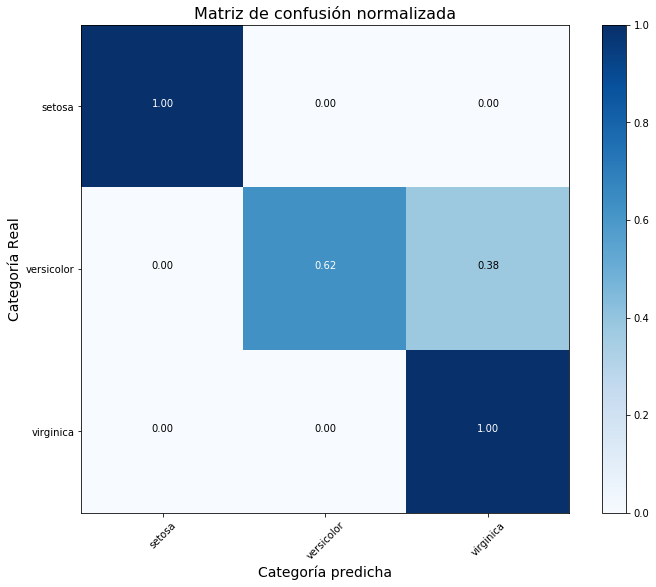

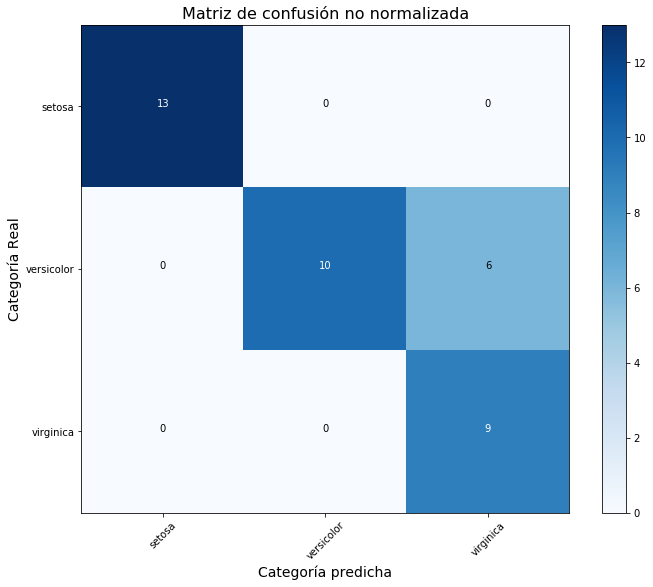

In [9]:
# Data and model
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(10, 8))
sp.plot_confusion_matrix(cnf_matrix, classes=class_names,
                  normalize=True, ylabel='Categoría Real', xlabel='Categoría predicha',
        title="Matriz de confusión normalizada")

plt.figure(figsize=(10, 8))
sp.plot_confusion_matrix(cnf_matrix, classes=class_names,
                  normalize=False, ylabel='Categoría Real', xlabel='Categoría predicha',
        title="Matriz de confusión no normalizada")

## Compare distributions (numerical & categorical)

In [3]:
import pandas as pd
iris = datasets.load_iris()
import matplotlib
matplotlib.style.use("fivethirtyeight")
X = iris.data
y = iris.target
class_names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target'] = pd.Categorical(df['target'])
df['group_sepal'] = pd.cut(df['sepal length (cm)'], bins=5)
df['group_petal'] = pd.cut(df['petal length (cm)'], bins=8)
df1 = df[0:60]
df2 = df[50:90]
df3 = df[90::]


,sepal length (cm),sepal width (cm)
metric,0.200353,0.0805556


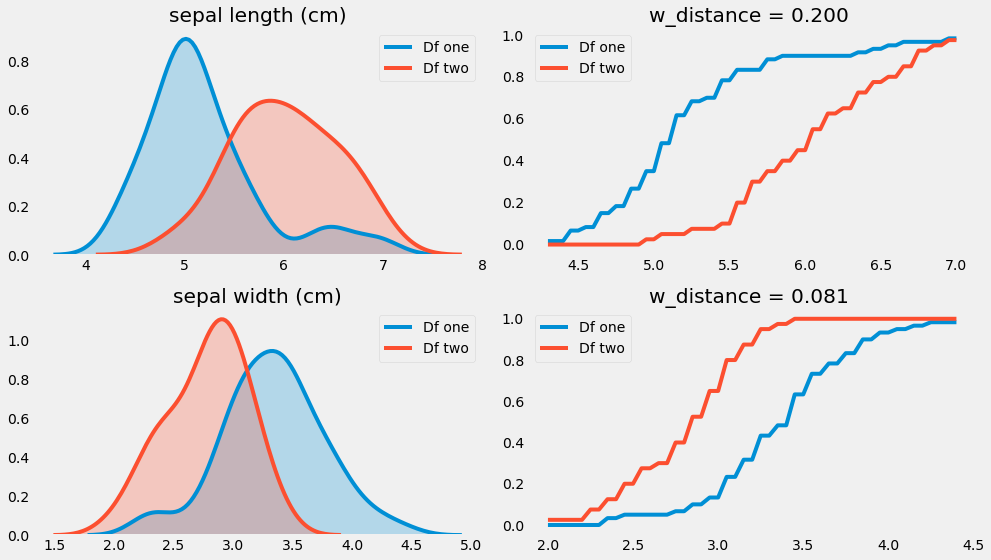

In [5]:
fig, axes, distances = sp.compare_cont_dists([df1, df2], 
                                             ['sepal length (cm)', 'sepal width (cm)'],
                                             labels=['Df one', 'Df two'], 
                                             nbins=20, normalize_distance=True, kde=True)

distances

#### Just get the distances, no plot

In [8]:
_, _, distances = sp.compare_cont_dists([df1, df2], 
                                        ['sepal length (cm)', 'sepal width (cm)'],
                                        labels=['Df one', 'Df two'], 
                                        nbins=20, normalize_distance=True, plot=False)

distances

,sepal length (cm),sepal width (cm)
metric,0.200353,0.0805556


### With three dataframes and no cumulative distribution function

,sepal length (cm),sepal width (cm)
metric,0.200353,0.0805556


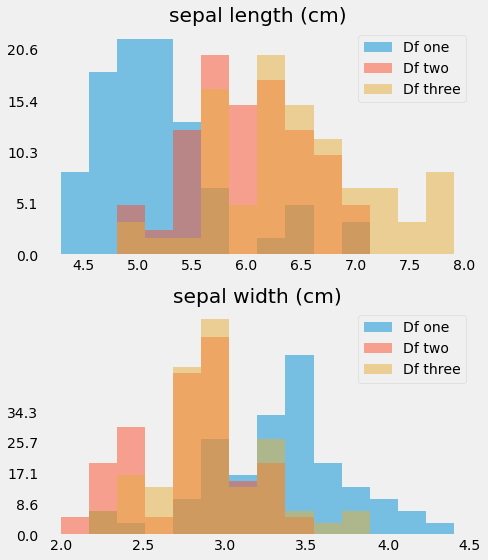

In [9]:
fig, axes, distances = sp.compare_cont_dists([df1, df2, df3], 
                                             ['sepal length (cm)', 'sepal width (cm)'],
                                             labels=['Df one', 'Df two', 'Df three'], 
                                             nbins=15, normalize_distance=True, plot_cdf=False)

distances

### Categorical Distribution plots

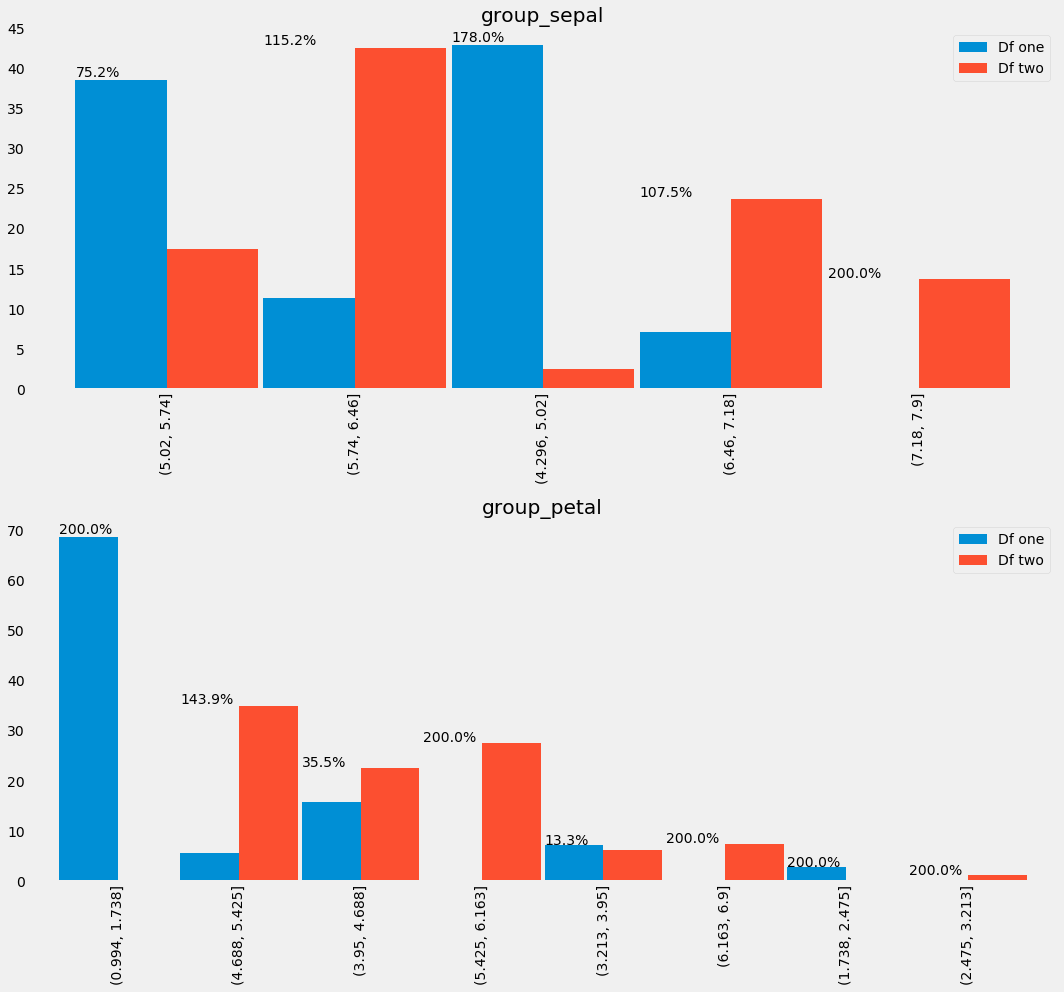

In [177]:
sp.compare_categorical_dists(df1, df2, ['group_sepal', 'group_petal'],
                     labels=['Df one', 'Df two']);

## Pdplot

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,33 mins 35 secs
H2O cluster timezone:,America/Santiago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,5 months and 16 days !!!
H2O cluster name:,H2O_from_python_camiloiturracisternas_io7ews
H2O cluster total nodes:,1
H2O cluster free memory:,3.278 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


(<Figure size 1080x1008 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a734e10>,
       dtype=object))

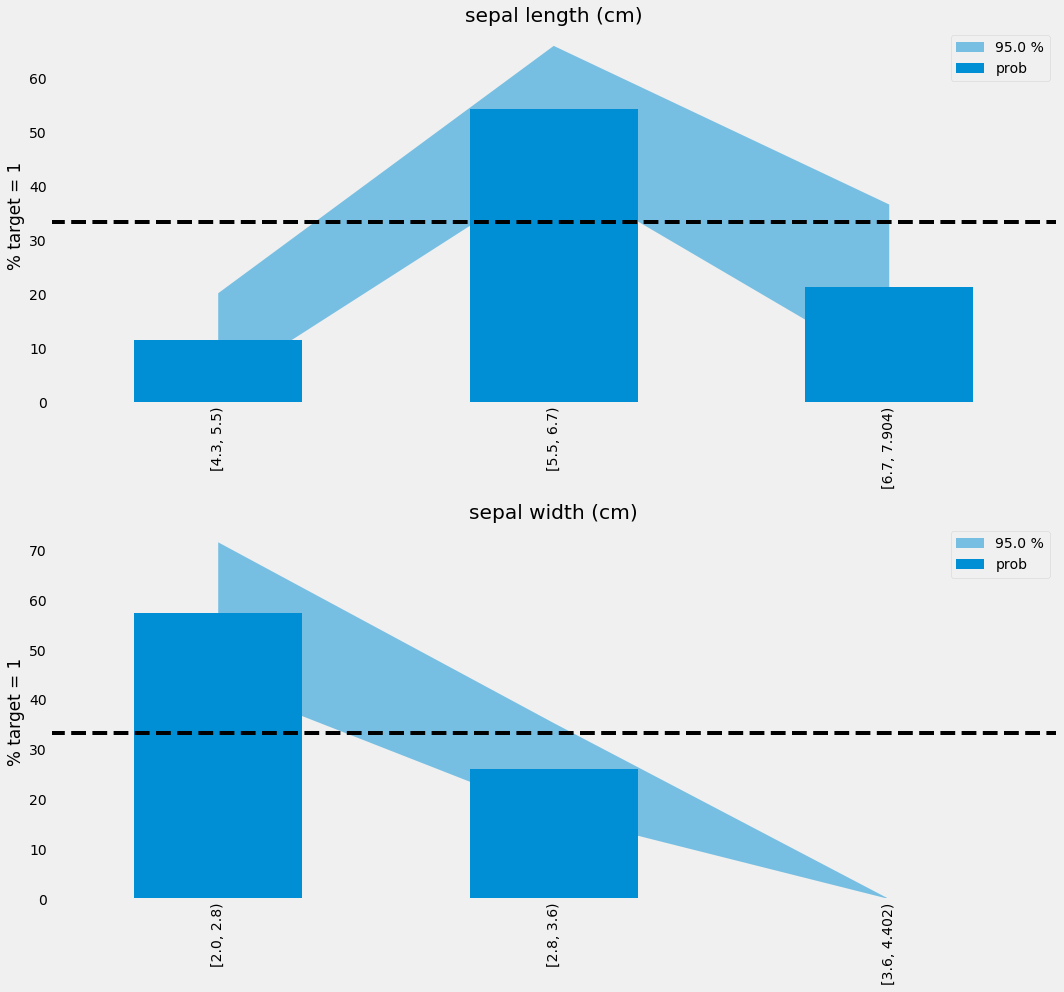

In [24]:
#Numerical variables
sp.pdplot(df, ['sepal length (cm)', 'sepal width (cm)'], 'target', numeric=True,
         nbins=3, confidence_q=[.95])

(<Figure size 1080x1008 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1283931d0>,
       dtype=object))

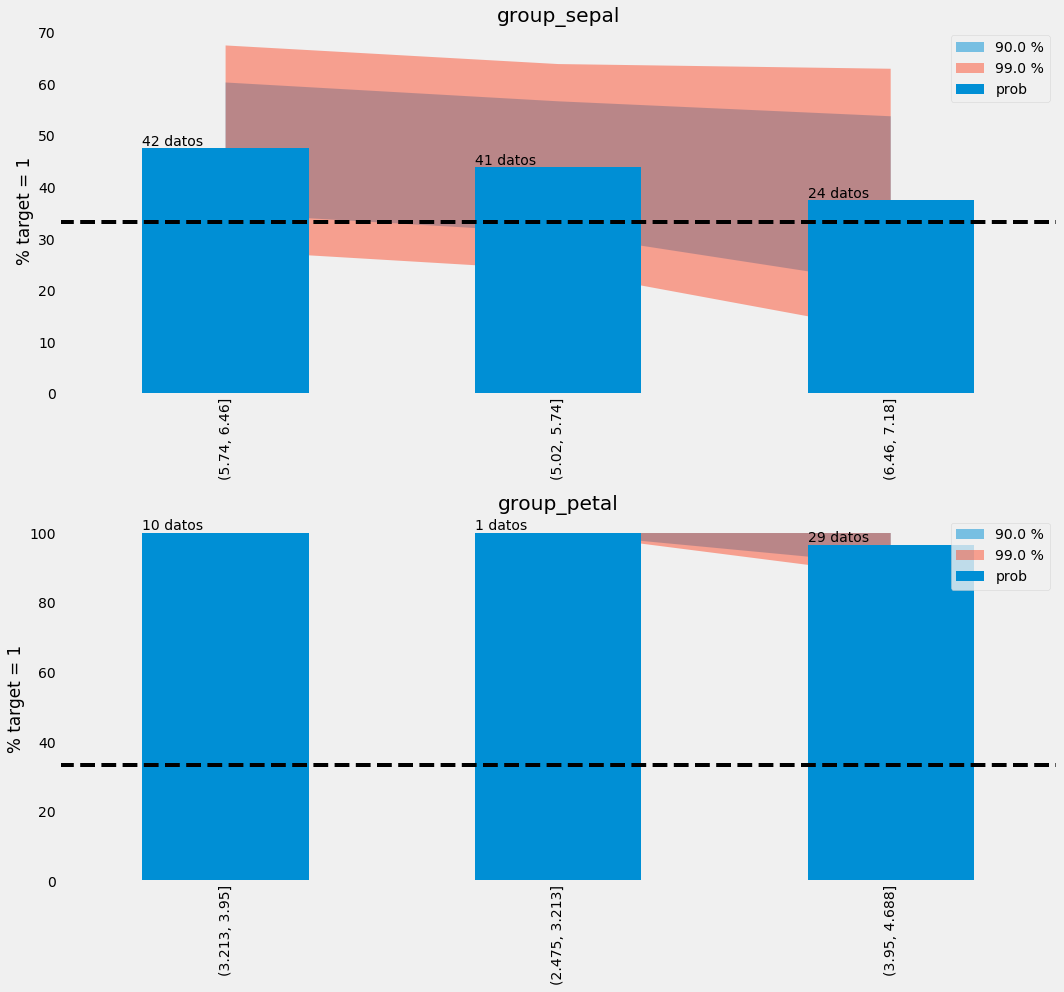

In [128]:
#Categorical variables
sp.pdplot(df, ['group_sepal', 'group_petal'], 'target', 
          numeric=False, 
          ncategories=3, 
          confidence_q=[.9, .99], 
          sort_q=.99)

(<Figure size 1080x1008 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x128806358>,
       dtype=object))

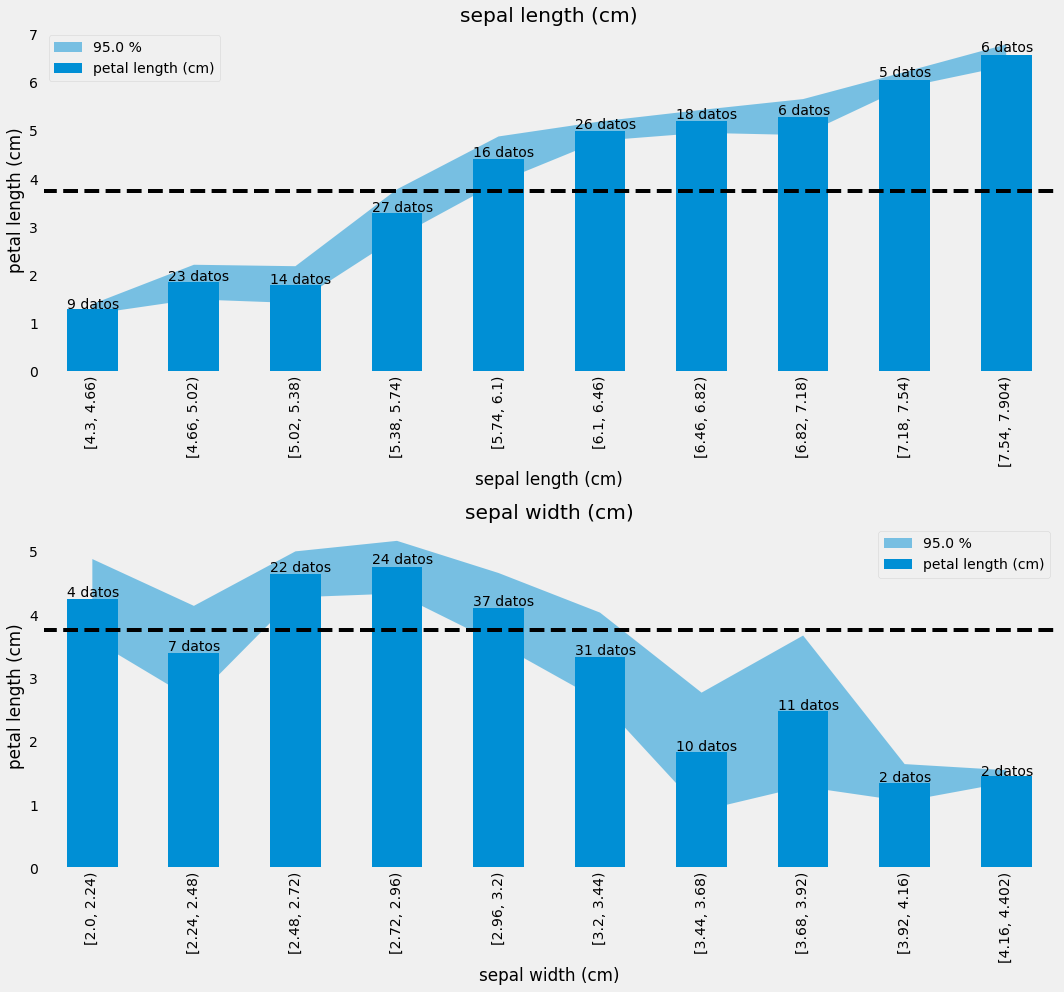

In [129]:
#Numerical variables and numerical target
sp.pdplot(df, ['sepal length (cm)', 'sepal width (cm)'], 'petal length (cm)', numeric=True,
         nbins=10, confidence_q=[.95], target_type='regression')

In [ ]:
df